In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector  ## added by mds
import awkward as ak
import iminuit
from iminuit import Minuit
from fit_classes import *
from utils import *
import os


In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:

# Define the base path to MC files
base_path = '/share/lazy/Bu2LambdaPHH/NTuples/MC/'

# List all files in the MC directory
mc_files = os.listdir(base_path)

# Extract unique MC types from the file names. We are assuming that the MC type is the whole part before the last "_"
mc_types = set([file.rsplit('_', 1)[0] for file in mc_files if file.endswith('.root')])

# Display the list of unique MC types to the user
print("Available MC types:")
for idx, mc_type in enumerate(mc_types, 1):
    print(f"{idx}. {mc_type}")


Available MC types:
1. MCB2L0barPPipPim
2. MCBu2L0barPD0bar,KPiPi0
3. MCBu2chic2K
4. MCBu2L0barPD0bar,KPi
5. MCB2L0barPPipPip
6. MCBd2L0barPDm,KPiPi
7. MCBu2L0barPPhi,KK
8. MCBd2LcPiPiP,L0barPi
9. MCB2L0barPKpPim
10. MCBd2L0barPDm,KKPi
11. MCB2L0barPPbarP
12. MCBu2LcbarPPi,L0barPiPi0
13. MCBu2L0barPetaP
14. MCBs2L0barPDsm,KKPi
15. MCB2L0barPKmPip
16. MCBu2chic0K
17. MCBs2L0barPDssm,Dsgamma,KKPi
18. MCBu2chic1K
19. MCBu2Psi2SK
20. MCBu2L0barLambda1520K,PK
21. MCBd2L0barPDsm,KKPi
22. MCBu2LcbarPPi,Sigma0barPiPi0
23. MCBu2JpsiK,PL0barK
24. MCB2PPbarPPbarPip
25. MCBd2LcbarL0K,PKPi
26. MCBu2L0barPeta,PiPiX
27. MCBu2LcbarPPi,L0barPim
28. MCB2L0PbarKpPip
29. MCBu2LcbarPPi,Sigma0barPi
30. MCB2L0barPKpKm
31. MCB2L0barPJpsi,PPbar
32. MCB2L0PbarKpKp
33. MCBu2etacK,PL0barK


In [5]:
import os

# List of MC types
mc_types = ['MCBu2L0barPD0bar,KPiPi0', 'MCBu2L0barLambda1520K,PK', 
            'MCBu2LcbarPPi,Sigma0barPi', 'MCBu2L0barPD0bar,KPi', 
            'MCBs2L0barPDssm,Dsgamma,KKPi', 'MCB2L0barPKpPim', 
            'MCBd2L0barPDsm,KKPi', 'MCB2L0barPKmPip', 
            'MCB2L0PbarKpPip', 'MCBd2LcPiPiP,L0barPi', 
            'MCBu2LcbarPPi,Sigma0barPiPi0', 'MCBs2L0barPDsm,KKPi',
            'MCBu2etacK,PL0barK', 'MCB2L0PbarKpKp', 
            'MCBd2L0barPDm,KPiPi', 'MCB2L0barPPbarP', 
            'MCB2L0barPPipPim', 'MCBu2L0barPetaP', 
            'MCBu2chic0K', 'MCBu2JpsiK,PL0barK', 
            'MCBu2L0barPPhi,KK', 'MCB2PPbarPPbarPip', 
            'MCBu2chic2K', 'MCBu2L0barPeta,PiPiX', 
            'MCBu2chic1K', 'MCB2L0barPJpsi,PPbar', 
            'MCBd2L0barPDm,KKPi', 'MCB2L0barPPipPip', 
            'MCBu2LcbarPPi,L0barPiPi0', 'MCBu2Psi2SK', 
            'MCBd2LcbarL0K,PKPi', 'MCBu2LcbarPPi,L0barPim', 
            'MCB2L0barPKpKm']


# Define available decay trees
available_trees = ['B2L0pbarpippim', 'B2L0pbarpippip', 'B2L0pbarKmpip', 
                   'B2L0pbarKppip', 'B2L0pbarKppim', 'B2L0pbarKpKm', 
                   'B2L0pbarpp', 'B2L0pbarKpKp']

# Show available decay trees
print("Available decay trees:")
for idx, tree in enumerate(available_trees, 1):
    print(f"{idx}. {tree}")

# Get a physicist input for selected tree
tree_idx = int(input("Please select the number of your desired decay tree: ")) - 1
decay_tree = available_trees[tree_idx]

# Define the base path to RD files
rd_base_path = '/share/lazy/Bu2LambdaPHH/NTuples/RD/'
rd_file_names = ['L0phh_18MU.root', 'L0phh_18MD.root', 'L0phh_17MU.root', 
                 'L0phh_17MD.root', 'L0phh_16MU.root', 'L0phh_16MD.root', 
                 'L0phh_15MU.root', 'L0phh_15MD.root']

rd_data = [f'{rd_base_path}{file_name}:{decay_tree}/DecayTree' for file_name in rd_file_names]

# Display the list of unique MC types to the user
print("\nAvailable MC types:")
for idx, mc_type in enumerate(mc_types, 1):
    print(f"{idx}. {mc_type}")

# Load MC data (assuming you have a function called load_mc_data)
mc_data = load_mc_data(mc_base_path, mc_types, decay_tree)


Available decay trees:
1. B2L0pbarpippim
2. B2L0pbarpippip
3. B2L0pbarKmpip
4. B2L0pbarKppip
5. B2L0pbarKppim
6. B2L0pbarKpKm
7. B2L0pbarpp
8. B2L0pbarKpKp

Available MC types:
1. MCBu2L0barPD0bar,KPiPi0
2. MCBu2L0barLambda1520K,PK
3. MCBu2LcbarPPi,Sigma0barPi
4. MCBu2L0barPD0bar,KPi
5. MCBs2L0barPDssm,Dsgamma,KKPi
6. MCB2L0barPKpPim
7. MCBd2L0barPDsm,KKPi
8. MCB2L0barPKmPip
9. MCB2L0PbarKpPip
10. MCBd2LcPiPiP,L0barPi
11. MCBu2LcbarPPi,Sigma0barPiPi0
12. MCBs2L0barPDsm,KKPi
13. MCBu2etacK,PL0barK
14. MCB2L0PbarKpKp
15. MCBd2L0barPDm,KPiPi
16. MCB2L0barPPbarP
17. MCB2L0barPPipPim
18. MCBu2L0barPetaP
19. MCBu2chic0K
20. MCBu2JpsiK,PL0barK
21. MCBu2L0barPPhi,KK
22. MCB2PPbarPPbarPip
23. MCBu2chic2K
24. MCBu2L0barPeta,PiPiX
25. MCBu2chic1K
26. MCB2L0barPJpsi,PPbar
27. MCBd2L0barPDm,KKPi
28. MCB2L0barPPipPip
29. MCBu2LcbarPPi,L0barPiPi0
30. MCBu2Psi2SK
31. MCBd2LcbarL0K,PKPi
32. MCBu2LcbarPPi,L0barPim
33. MCB2L0barPKpKm
Selected decay tree: B2L0pbarKpKp
Selected MC type: MCB2L0PbarKpKp


In [6]:
arrs_rd = uproot.concatenate(rd_data)
print("RD Concantenated arrays are ready:")
print(f"RD Number of events: {len(arrs_rd)}")


RD Concantenated arrays are ready:
RD Number of events: 11705


In [7]:
# Define variables for real data
h1_P = arrs_rd['h1_P']
h1_PT = arrs_rd['h1_PT']
h1_PE = arrs_rd['h1_PE']
h1_PX = arrs_rd['h1_PX']
h1_PY = arrs_rd['h1_PY']
h1_PZ = arrs_rd['h1_PZ']
h1_ID = arrs_rd['h1_ID']
h1_TRACK_Type = arrs_rd['h1_TRACK_Type']
h2_P = arrs_rd['h2_P']
h2_PT = arrs_rd['h2_PT']
h2_PE = arrs_rd['h2_PE']
h2_PX = arrs_rd['h2_PX']
h2_PY = arrs_rd['h2_PY']
h2_PZ = arrs_rd['h2_PZ']
h2_ID = arrs_rd['h2_ID']
h2_TRACK_Type = arrs_rd['h2_TRACK_Type']
p_P = arrs_rd['p_P']
p_PT = arrs_rd['p_PT']
p_PE = arrs_rd['p_PE']
p_PX = arrs_rd['p_PX']
p_PY = arrs_rd['p_PY']
p_PZ = arrs_rd['p_PZ']
p_ID = arrs_rd['p_ID']
p_TRACK_Type = arrs_rd['p_TRACK_Type']
Lp_P = arrs_rd['Lp_P']
Lp_PT = arrs_rd['Lp_PT']
Lp_PE = arrs_rd['Lp_PE']
Lp_PX = arrs_rd['Lp_PX']
Lp_PY = arrs_rd['Lp_PY']
Lp_PZ = arrs_rd['Lp_PZ']
Lp_ID = arrs_rd['Lp_ID']
Lp_TRACK_Type = arrs_rd['Lp_TRACK_Type']
Lp_ProbNNp = arrs_rd['Lp_ProbNNp']
LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)
Lpi_P = arrs_rd['Lpi_P']
Lpi_PT = arrs_rd['Lpi_PT']
Lpi_PE = arrs_rd['Lpi_PE']
Lpi_PX = arrs_rd['Lpi_PX']
Lpi_PY = arrs_rd['Lpi_PY']
Lpi_PZ = arrs_rd['Lpi_PZ']
Lpi_ID = arrs_rd['Lpi_ID']
Lpi_TRACK_Type = arrs_rd['Lpi_TRACK_Type']
Lpi_ProbNNpi = arrs_rd['Lpi_ProbNNpi']
L0_P = arrs_rd['L0_P']
L0_PT = arrs_rd['L0_PT']
L0_PE = arrs_rd['L0_PE']
L0_PX = arrs_rd['L0_PX']
L0_PY = arrs_rd['L0_PY']
L0_PZ = arrs_rd['L0_PZ']
L0_ID = arrs_rd['L0_ID']
L0_MM = arrs_rd['L0_MM']
L0_DOCA12 = arrs_rd['L0_DOCA12']


In [8]:
arrs_mc = uproot.concatenate(mc_data)
print("MC Concantenated arrays are ready:")
print(f"MC Number of events: {len(arrs_mc)}")


MC Concantenated arrays are ready:
MC Number of events: 36184


In [9]:
# Define variables for Monte Carlo data
h1_P_mc = arrs_mc['h1_P']
h1_PT_mc = arrs_mc['h1_PT']
h1_PE_mc = arrs_mc['h1_PE']
h1_PX_mc = arrs_mc['h1_PX']
h1_PY_mc = arrs_mc['h1_PY']
h1_PZ_mc = arrs_mc['h1_PZ']
h1_ID_mc = arrs_mc['h1_ID']
h1_TRACK_Type_mc = arrs_mc['h1_TRACK_Type']
h2_P_mc = arrs_mc['h2_P']
h2_PT_mc = arrs_mc['h2_PT']
h2_PE_mc = arrs_mc['h2_PE']
h2_PX_mc = arrs_mc['h2_PX']
h2_PY_mc = arrs_mc['h2_PY']
h2_PZ_mc = arrs_mc['h2_PZ']
h2_ID_mc = arrs_mc['h2_ID']
h2_TRACK_Type_mc = arrs_mc['h2_TRACK_Type']
p_P_mc = arrs_mc['p_P']
p_PT_mc = arrs_mc['p_PT']
p_PE_mc = arrs_mc['p_PE']
p_PX_mc = arrs_mc['p_PX']
p_PY_mc = arrs_mc['p_PY']
p_PZ_mc = arrs_mc['p_PZ']
p_ID_mc = arrs_mc['p_ID']
p_TRACK_Type_mc = arrs_mc['p_TRACK_Type']
Lp_P_mc = arrs_mc['Lp_P']
Lp_PT_mc = arrs_mc['Lp_PT']
Lp_PE_mc = arrs_mc['Lp_PE']
Lp_PX_mc = arrs_mc['Lp_PX']
Lp_PY_mc = arrs_mc['Lp_PY']
Lp_PZ_mc = arrs_mc['Lp_PZ']
Lp_ID_mc = arrs_mc['Lp_ID']
Lp_TRACK_Type_mc = arrs_mc['Lp_TRACK_Type']
Lp_ProbNNp_mc = arrs_mc['Lp_ProbNNp']
LL_mc = (3 == Lp_TRACK_Type_mc)
DD_mc = (5 == Lp_TRACK_Type_mc)
Lpi_P_mc = arrs_mc['Lpi_P']
Lpi_PT_mc = arrs_mc['Lpi_PT']
Lpi_PE_mc = arrs_mc['Lpi_PE']
Lpi_PX_mc = arrs_mc['Lpi_PX']
Lpi_PY_mc = arrs_mc['Lpi_PY']
Lpi_PZ_mc = arrs_mc['Lpi_PZ']
Lpi_ID_mc = arrs_mc['Lpi_ID']
Lpi_TRACK_Type_mc = arrs_mc['Lpi_TRACK_Type']
Lpi_ProbNNpi_mc = arrs_mc['Lpi_ProbNNpi']
L0_P_mc = arrs_mc['L0_P']
L0_PT_mc = arrs_mc['L0_PT']
L0_PE_mc = arrs_mc['L0_PE']
L0_PX_mc = arrs_mc['L0_PX']
L0_PY_mc = arrs_mc['L0_PY']
L0_PZ_mc = arrs_mc['L0_PZ']
L0_ID_mc = arrs_mc['L0_ID']
L0_MM_mc = arrs_mc['L0_MM']
L0_DOCA12_mc = arrs_mc['L0_DOCA12']

In [10]:
print('Lp_ID = ',Lp_ID)
if np.any(np.bitwise_or(Lp_ID == 2212, Lp_ID == -2212)):
    print('Lp is pi-/+ particles (that should come from Lambda)')
else:
    print('Lp is not pi-/+ particles (that should come from Lambda)')    
print('p_ID = ', p_ID)
if np.any(np.bitwise_or(p_ID == 2212, p_ID == -2212)):
    print('p is p-/+ particles')
else:
    print('p is not p-/+ particles. probably something went wrong')    
print('h1_ID =', h1_ID)
if np.any(np.bitwise_or(h1_ID == 211, h1_ID == -211)):
    print('h1 is pi-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 321, h1_ID == -321)):
    print('h1 is K-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 2212, h1_ID == -2212)):
    print('h1 is p-/+ particles')    
print('h2_ID =', h2_ID)
if np.any(np.bitwise_or(h2_ID == 211, h2_ID == -211)):
    print('h2 is pi-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 321, h2_ID == -321)):
    print('h2 is K-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 2212, h2_ID == -2212)):
    print('h2 is p-/+ particles')        
print('Lpi_ID =', Lpi_ID)
if np.any(np.bitwise_or(Lpi_ID == 211, Lpi_ID == -211)):
    print('Lpi is pi-/+ particles (that should come from Lambda)')
else:
    print('Lpi is not pi-/+ particles (that should come from Lambda)')    
print('L0_ID =', L0_ID)
if np.any(np.bitwise_or(L0_ID == 3122, L0_ID == -3122)):
    print('L0 is Lambda particles')
else:
    print('L0 is not Lambda particles. probably something went wrong')    


Lp_ID =  [2212, 2212, 2212, 2212, -2212, -2212, ..., 2212, 2212, -2212, 2212, -2212]
Lp is pi-/+ particles (that should come from Lambda)
p_ID =  [-2212, -2212, -2212, -2212, 2212, 2212, ..., -2212, -2212, 2212, -2212, 2212]
p is p-/+ particles
h1_ID = [321, 321, 321, 321, -321, -321, 321, ..., -321, 321, 321, -321, 321, -321]
h1 is K-/+ particles
h2_ID = [321, 321, 321, 321, -321, -321, 321, ..., -321, 321, 321, -321, 321, -321]
h2 is K-/+ particles
Lpi_ID = [-211, -211, -211, -211, 211, 211, -211, ..., 211, -211, -211, 211, -211, 211]
Lpi is pi-/+ particles (that should come from Lambda)
L0_ID = [3122, 3122, 3122, 3122, -3122, -3122, ..., 3122, 3122, -3122, 3122, -3122]
L0 is Lambda particles


In [11]:
Bu_FDCHI2_OWNPV = arrs_rd['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X = arrs_rd['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs_rd['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs_rd['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs_rd['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs_rd['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs_rd['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs_rd['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs_rd['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs_rd['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs_rd['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty
Bu_ENDVERTEX_X = arrs_rd['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs_rd['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs_rd['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs_rd['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs_rd['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs_rd['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs_rd['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs_rd['Bu_MM'] # The invariant mass of the Bu candidate

Bu_DOCA12 = arrs_rd['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices
Delta_X_ERR_sq = np.square(Delta_X_ERR)
Delta_Y_ERR_sq = np.square(Delta_Y_ERR)
Delta_Z_ERR_sq = np.square(Delta_Z_ERR)

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty


In [12]:
Bu_FDCHI2_OWNPV = arrs_rd['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X = arrs_rd['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs_rd['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs_rd['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs_rd['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs_rd['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs_rd['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs_rd['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs_rd['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs_rd['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs_rd['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty
Bu_ENDVERTEX_X = arrs_rd['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs_rd['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs_rd['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs_rd['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs_rd['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs_rd['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs_rd['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs_rd['Bu_MM'] # The invariant mass of the Bu candidate

Bu_DOCA12 = arrs_rd['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices
Delta_X_ERR_sq = np.square(Delta_X_ERR)
Delta_Y_ERR_sq = np.square(Delta_Y_ERR)
Delta_Z_ERR_sq = np.square(Delta_Z_ERR)

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty


In [13]:
Bu_FDCHI2_OWNPV_mc = arrs_mc['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X_mc = arrs_mc['L0_ENDVERTEX_X']
L0_ENDVERTEX_Y_mc = arrs_mc['L0_ENDVERTEX_Y']
L0_ENDVERTEX_Z_mc = arrs_mc['L0_ENDVERTEX_Z']
L0_ENDVERTEX_XERR_mc = arrs_mc['L0_ENDVERTEX_XERR']
L0_ENDVERTEX_YERR_mc = arrs_mc['L0_ENDVERTEX_YERR']
L0_ENDVERTEX_ZERR_mc = arrs_mc['L0_ENDVERTEX_ZERR']
L0_OWNPV_Z_mc = arrs_mc['L0_OWNPV_Z']
L0_OWNPV_ZERR_mc = arrs_mc['L0_OWNPV_ZERR']
L0_FD_OWNPV_mc = arrs_mc['L0_FD_OWNPV']
L0_FDCHI2_OWNPV_mc = arrs_mc['L0_FDCHI2_OWNPV']
Bu_ENDVERTEX_X_mc = arrs_mc['Bu_ENDVERTEX_X']
Bu_ENDVERTEX_Y_mc = arrs_mc['Bu_ENDVERTEX_Y']
Bu_ENDVERTEX_Z_mc = arrs_mc['Bu_ENDVERTEX_Z']
Bu_ENDVERTEX_XERR_mc = arrs_mc['Bu_ENDVERTEX_XERR']
Bu_ENDVERTEX_YERR_mc = arrs_mc['Bu_ENDVERTEX_YERR']
Bu_ENDVERTEX_ZERR_mc = arrs_mc['Bu_ENDVERTEX_ZERR']
Bu_IPCHI2_OWNPV_mc = arrs_mc['Bu_IPCHI2_OWNPV']
Bu_MM_mc = arrs_mc['Bu_MM']
Bu_DOCA12_mc = arrs_mc['Bu_DOCA12']

Delta_Z_mc = L0_ENDVERTEX_Z_mc - Bu_ENDVERTEX_Z_mc
Delta_X_mc = L0_ENDVERTEX_X_mc - Bu_ENDVERTEX_X_mc
Delta_Y_mc = L0_ENDVERTEX_Y_mc - Bu_ENDVERTEX_Y_mc
Delta_X_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_XERR_mc)+np.square(L0_ENDVERTEX_XERR_mc))
Delta_Y_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_YERR_mc)+np.square(L0_ENDVERTEX_YERR_mc))
Delta_Z_ERR_mc = np.sqrt(np.square(Bu_ENDVERTEX_ZERR_mc)+np.square(L0_ENDVERTEX_ZERR_mc))
Delta_X_ERR_sq_mc = np.square(Delta_X_ERR_mc)
Delta_Y_ERR_sq_mc = np.square(Delta_Y_ERR_mc)
Delta_Z_ERR_sq_mc = np.square(Delta_Z_ERR_mc)

delta_x_mc = np.divide(Delta_X_mc,Delta_X_ERR_mc)
delta_y_mc = np.divide(Delta_Y_mc,Delta_Y_ERR_mc)
delta_z_mc = np.divide(Delta_Z_mc,Delta_Z_ERR_mc)
L0_FD_CHISQ_mc = np.square(delta_x_mc) + np.square(delta_y_mc) + np.square(delta_z_mc)


In [14]:
# Data cuts and definitions

h1_probNNk = arrs_rd['h1_MC15TuneV1_ProbNNk']
h2_probNNk = arrs_rd['h2_MC15TuneV1_ProbNNk']
p_ProbNNp  = arrs_rd['p_MC15TuneV1_ProbNNp']


good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9
bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100



ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProbNNx = np.multiply(p_ProbNNp,prodProbKK)

good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

temp_cut = good_Delta_Z & good_Lambda_chisq_100 & (Lp_ProbNNp>0.2)
temp_cutLL = temp_cut & LL
temp_cutDD = temp_cut & DD

Lets plot the B+ mass for both MC and Data

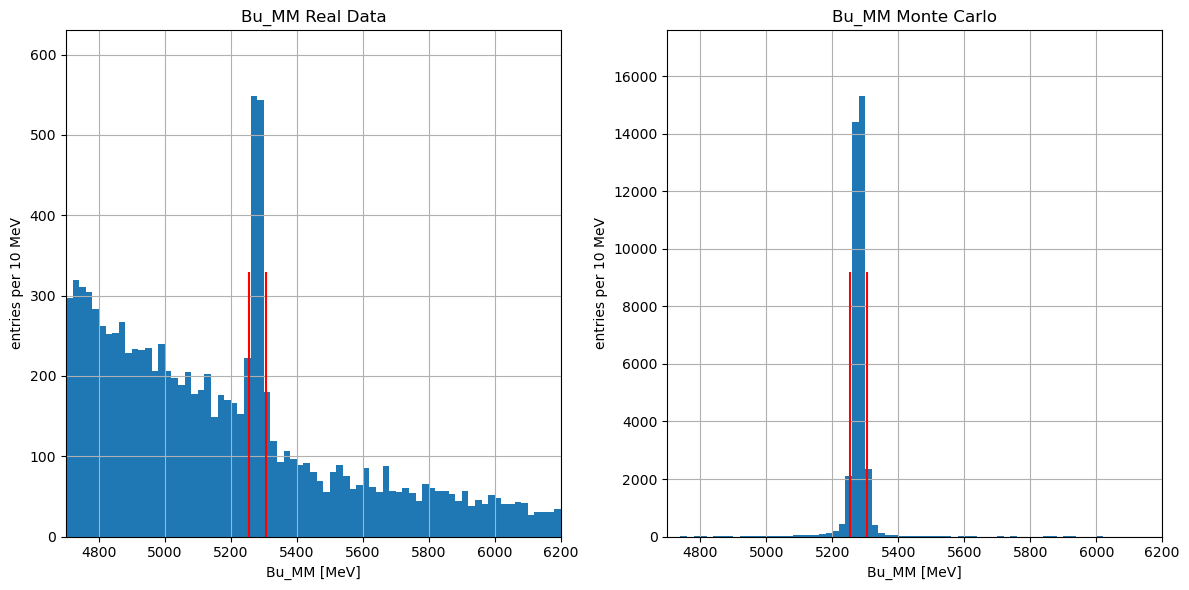

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # Creates 2 subplots side by side

# Compute and plot real data histogram
nC, bins, _ = axs[0].hist(Bu_MM, bins=75, range=(4700,6200)) # Bu_MM should be calculated from real data
axs[0].set_title('Bu_MM Real Data')
axs[0].set_xlabel(r'Bu_MM [MeV]')
axs[0].set_ylabel('entries per 10 MeV')
axs[0].axis([4700,6200.,0,1.15*max(nC)])
axs[0].grid(True)
axs[0].vlines(5255., 0., 0.6*max(nC), colors='red')
axs[0].vlines(5305., 0., 0.6*max(nC), colors='red')

# Compute and plot Monte Carlo histogram
nC_mc, bins_mc, _ = axs[1].hist(Bu_MM_mc, bins=75, range=(4700,6200)) # Bu_MM_mc should be calculated from MC data
axs[1].set_title('Bu_MM Monte Carlo')
axs[1].set_xlabel(r'Bu_MM [MeV]')
axs[1].set_ylabel('entries per 10 MeV')
axs[1].axis([4700,6200.,0,1.15*max(nC_mc)])
axs[1].grid(True)
axs[1].vlines(5255., 0., 0.6*max(nC_mc), colors='red')
axs[1].vlines(5305., 0., 0.6*max(nC_mc), colors='red')

plt.tight_layout()
plt.show()


We can do the same for Lambda 

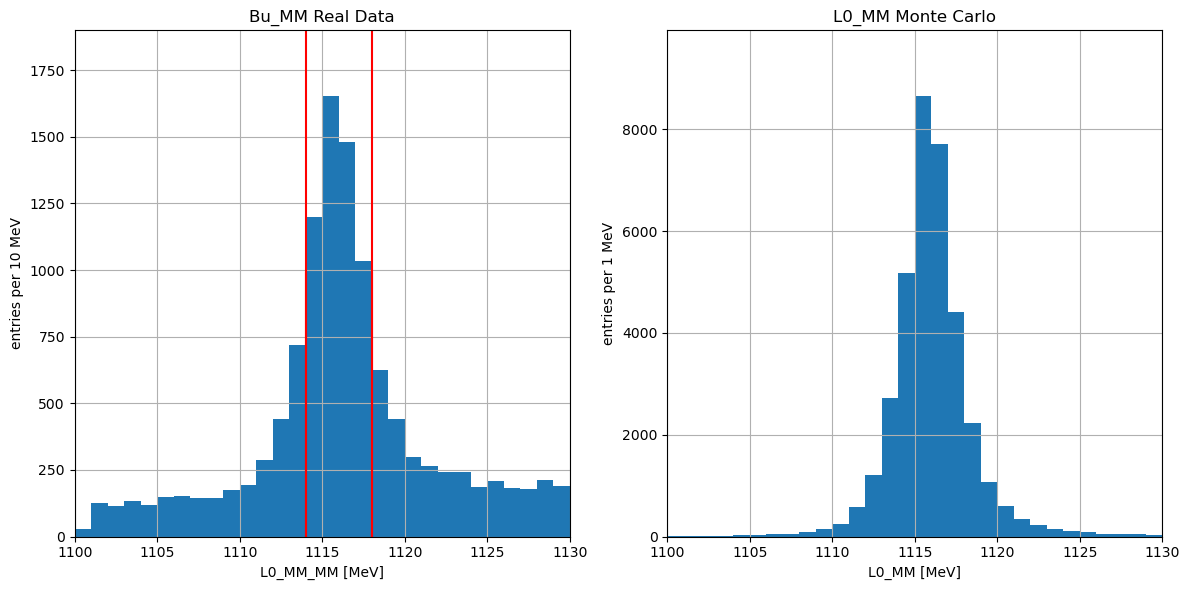

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6)) # Creates 2 subplots side by side

# Compute and plot real data histogram
nC, bins, _ = axs[0].hist(L0_MM, bins=30, range=(1100, 1130)) # L0_MM should be calculated from real data
axs[0].set_title('Bu_MM Real Data')
axs[0].set_xlabel(r'L0_MM_MM [MeV]')
axs[0].set_ylabel('entries per 10 MeV')
axs[0].axis([1100, 1130.,0,1.15*max(nC)])
axs[0].grid(True)
axs[0].vlines(1114., 0., 0.6*max(nC), colors='red')
axs[0].vlines(1118., 0., 0.6*max(nC), colors='red')

# Compute and plot Monte Carlo histogram
nC_mc, bins_mc, _ = axs[1].hist(L0_MM_mc, bins=30, range=(1100, 1130)) # L0_MM_mc should be calculated from MC data
axs[1].set_title('L0_MM Monte Carlo')
axs[1].set_xlabel(r'L0_MM [MeV]')
axs[1].set_ylabel('entries per 1 MeV')
axs[1].axis([1100, 1130.,0,1.15*max(nC_mc)])
axs[1].grid(True)
axs[0].vlines(1114., 0., 0.6*max(nC_mc), colors='red')
axs[0].vlines(1118., 0., 0.6*max(nC_mc), colors='red')

plt.tight_layout()
plt.show()


## Resounances

In [19]:
good_b = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)  & B_region
good_cand = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)


In [20]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE}) # K+ rd
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE}) # K+ rd 
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE}) # p rd 
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE}) # L0 rd 

K1_4vec_mc = vector.awk({"x":h1_PX_mc, "y":h1_PY_mc, "z":h1_PZ_mc, "t":h1_PE_mc}) # K+ mc
K2_4vec_mc = vector.awk({"x":h2_PX_mc, "y":h2_PY_mc, "z":h2_PZ_mc, "t":h2_PE_mc}) # K+ mc
p_4vec_mc  = vector.awk({"x":p_PX_mc,  "y":p_PY_mc,  "z":p_PZ_mc,  "t":p_PE_mc}) # p mc
L0_4vec_mc = vector.awk({"x":L0_PX_mc,  "y":L0_PY_mc,  "z":L0_PZ_mc,  "t":L0_PE_mc}) # L0 mc

KK_4vec  = K1_4vec+K2_4vec
KK_mass  = KK_4vec.tau
KK_4vec_mc  = K1_4vec_mc+K2_4vec_mc
KK_mass_mc  = KK_4vec_mc.tau
pKK_4vec = p_4vec+KK_4vec 
pKK_4vec_mc = p_4vec_mc+KK_4vec_mc





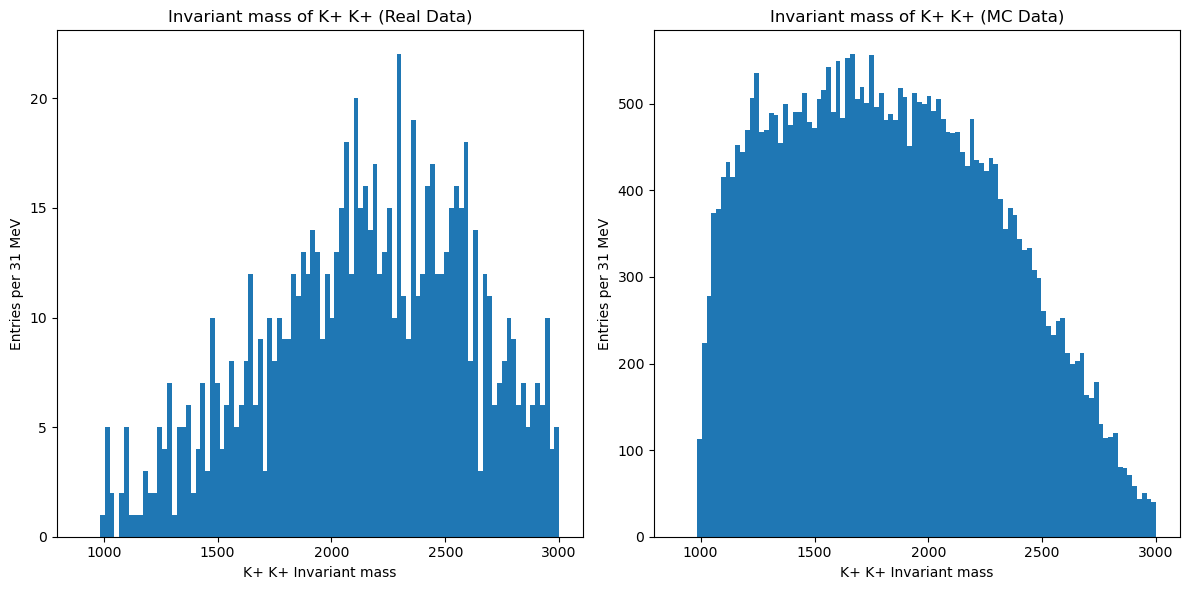

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns of subplots

# Real data plot
axs[0].hist(KK_mass[good_b], bins=100, range=(900, 3000))
axs[0].set_title("Invariant mass of K+ K+ (Real Data)")
axs[0].set_xlabel("K+ K+ Invariant mass")
axs[0].set_ylabel("Entries per 31 MeV")

# MC data plot
axs[1].hist(KK_mass_mc, bins=100, range=(900, 3000))  # Assuming good_b_mc for MC data
axs[1].set_title("Invariant mass of K+ K+ (MC Data)")
axs[1].set_xlabel("K+ K+ Invariant mass")
axs[1].set_ylabel("Entries per 31 MeV")

plt.tight_layout()  # To ensure proper spacing between plots
plt.show()


### Λ p K⁺

In [27]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (First K+)
LbarpKp1_4vec = L0_4vec + p_4vec + K1_4vec
LbarpKp1_mass = np.sqrt(np.square(LbarpKp1_4vec.t) - np.square(LbarpKp1_4vec.x) - np.square(LbarpKp1_4vec.y) - np.square(LbarpKp1_4vec.z))


LbarpKp1_4vec_mc = L0_4vec_mc + p_4vec_mc + K1_4vec_mc
LbarpKp1_mass_mc = np.sqrt(np.square(LbarpKp1_4vec_mc.t) - np.square(LbarpKp1_4vec_mc.x) - np.square(LbarpKp1_4vec_mc.y) - np.square(LbarpKp1_4vec_mc.z))

# Now lets add the Λ₋pK₂⁺ system and define a four momentum for it (Second K+)
LbarpKp2_4vec = L0_4vec + p_4vec + K2_4vec
LbarpKp2_4vec_mc = L0_4vec_mc + p_4vec_mc + K2_4vec_mc
LbarpKp2_mass = np.sqrt(np.square(LbarpKp2_4vec.t) - np.square(LbarpKp2_4vec.x) - np.square(LbarpKp2_4vec.y) - np.square(LbarpKp2_4vec.z))
LbarpKp2_mass_mc = np.sqrt(np.square(LbarpKp2_4vec_mc.t) - np.square(LbarpKp2_4vec_mc.x) - np.square(LbarpKp2_4vec_mc.y) - np.square(LbarpKp2_4vec_mc.z))



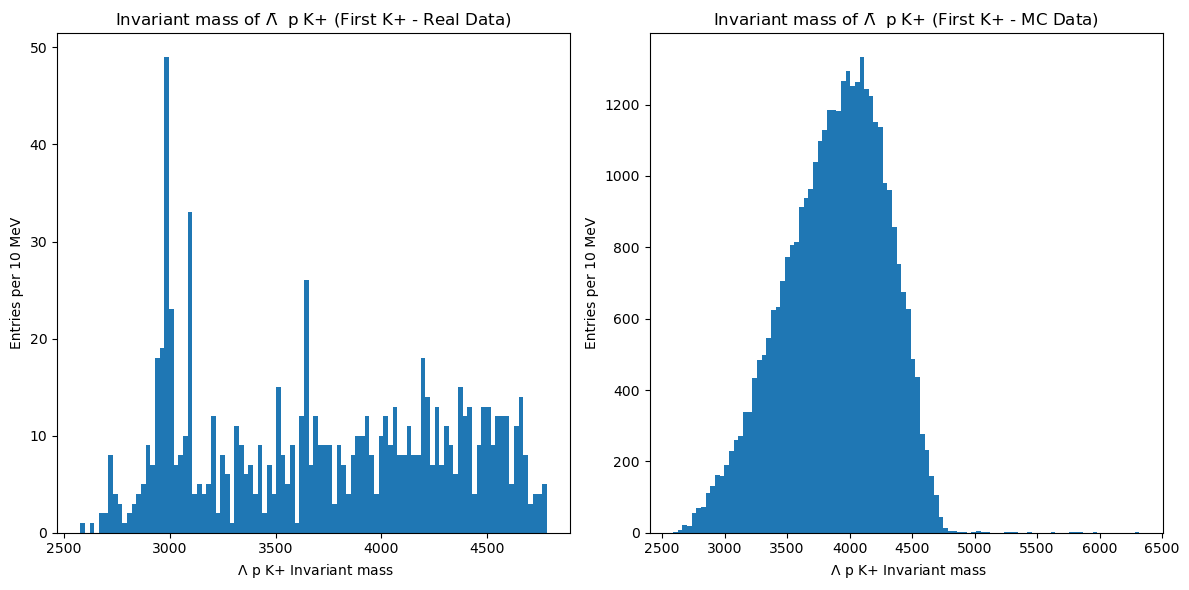

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns of subplots

# Real data plot
axs[0].hist(LbarpKp1_mass[good_b], bins=100)
axs[0].set_title(r"Invariant mass of $\Lambda$̄  p K+ (First K+ - Real Data)")
axs[0].set_xlabel(r" $\Lambda$ p K+ Invariant mass")
axs[0].set_ylabel("Entries per 10 MeV")

# MC data plot
axs[1].hist(LbarpKp1_mass_mc, bins=100)  # Assuming good_b_mc for MC data
axs[1].set_title(r"Invariant mass of $\Lambda$̄  p K+ (First K+ - MC Data)")
axs[1].set_xlabel(r" $\Lambda$ p K+ Invariant mass")
axs[1].set_ylabel("Entries per 10 MeV")

plt.tight_layout()  # To ensure proper spacing between plots
plt.show()


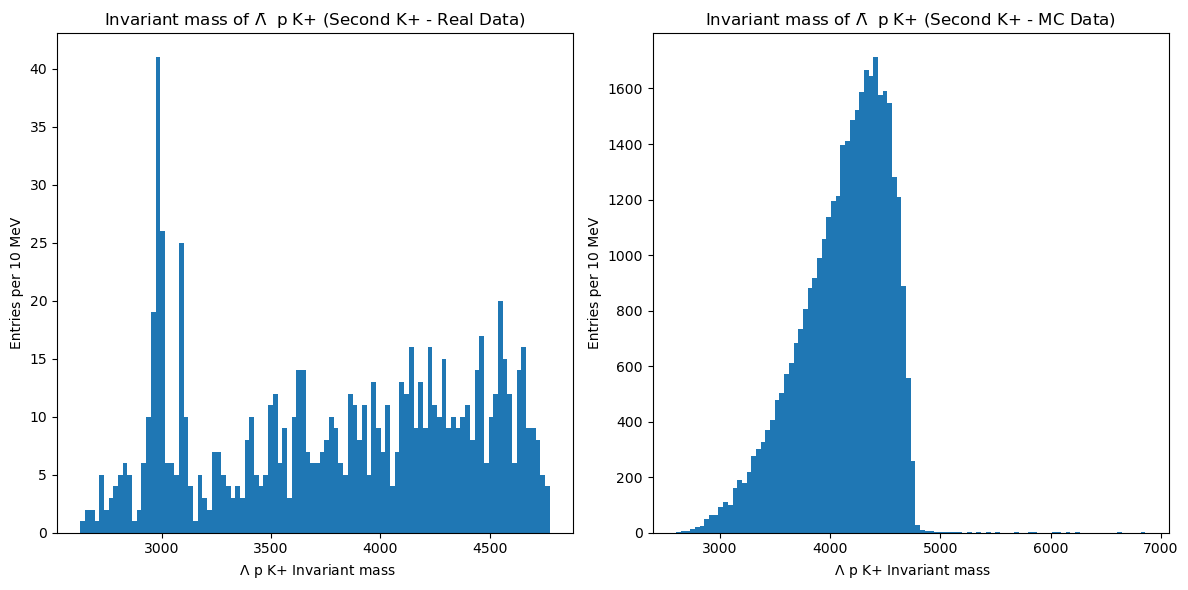

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns of subplots

# Real data plot
axs[0].hist(LbarpKp2_mass[good_b], bins=100)
axs[0].set_title(r"Invariant mass of $\Lambda$̄  p K+ (Second K+ - Real Data)")
axs[0].set_xlabel(r" $\Lambda$ p K+ Invariant mass")
axs[0].set_ylabel("Entries per 10 MeV")

# MC data plot
axs[1].hist(LbarpKp2_mass_mc, bins=100)  # Assuming good_b_mc for MC data
axs[1].set_title(r"Invariant mass of $\Lambda$̄  p K+ (Second K+ - MC Data)")
axs[1].set_xlabel(r" $\Lambda$ p K+ Invariant mass")
axs[1].set_ylabel("Entries per 10 MeV")

plt.tight_layout()  # To ensure proper spacing between plots
plt.show()


### $K^{+} K^{+}$

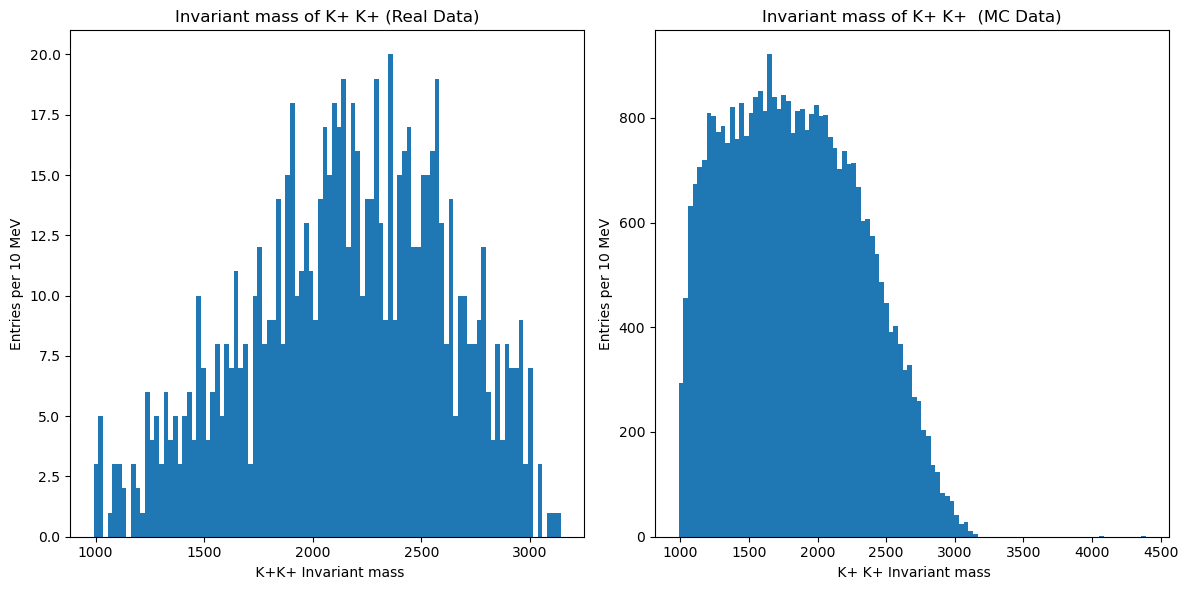

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with 1 row and 2 columns of subplots

# Real data plot
axs[0].hist(KK_mass[good_b], bins=100)
axs[0].set_title(r"Invariant mass of K+ K+ (Real Data)")
axs[0].set_xlabel(r" K+K+ Invariant mass")
axs[0].set_ylabel("Entries per 10 MeV")

# MC data plot
axs[1].hist(KK_mass_mc, bins=100)  # Assuming good_b_mc for MC data
axs[1].set_title(r"Invariant mass of K+ K+  (MC Data)")
axs[1].set_xlabel(r" K+ K+ Invariant mass")
axs[1].set_ylabel("Entries per 10 MeV")

plt.tight_layout()  # To ensure proper spacing between plots
plt.show()
